# Python How To

Crib notes on some useful tasks and procedures



## FAQ


Q: What are the Jupyter notebook commands? 

A: Look [here](http://jupyter-notebook.readthedocs.org/en/latest/notebook.html) and 
[also here](http://nbviewer.jupyter.org/github/jupyter/notebook/tree/master/docs/source/examples/Notebook/)


Q: A good book on Python-based data science? 

A: Jake Vanderplas' [___The Python Data Science Handbook___](http://shop.oreilly.com/product/0636920034919.do)

Q: How does plotting work?

A: See the section below on plotting basics

Q: What about slicing up multi-dimensional data?

A: This topic is out of scope; but you can get a view of it by looking into
[this notebook](http://nbviewer.jupyter.org/url/uwescience.github.io/python-seminar-2015/notebooks/xray_and_dask.ipynb)
by Anthony Arendt


Q: How does one convert an IPython Notebook to a slide deck from an IPython Notebook?

A: [Install _reveal_ from github](https://github.com/hakimel/reveal.js/)


Q: How does one include maps in an IPython Notebook?

A: [Check the cartopy installation instructions](http://scitools.org.uk/cartopy/docs/latest/index.html)

## Plotting basics

This section blurs the line between being a mathematician and being a coder. Learning to code in Python 
is a big investment of time; and it is out of scope here to try and support that process. However we can
often get by with a minimal set of examples that we can modify. To that end here is a quick comment to
get started on this section.


The following code is worth running in its own cell: 


```
    a = 'abcdefghijklmnopqrstuvwxyz'
    for b in a: 
        print(b)
```


This is an example of a data structure in Python: **`a`** is a string that works as an ordered set of individual characters.

Likewise we have the **list** data structure delineated in Python using square brackets **`[ ... ]`**


```
    x = [3, 4, 5, 6, 7]
    print(x)
    for xx in x: 
        print(xx)
```


Data structures are often ordered sets where the elements are examined 
in sequence, for example in creating a data chart. Such data structures are called *enumerable*.


Now to plotting!


* The **`matplotlib`** library is the basis for plotting used here. It is not simple but it has capabilities.
    * Often **`pyplot`** is imported from **`matplotlib`** and abbreviated as **`plt`**
    * **`plt`** is a stateful interface: There is a current figure and a current axis or axes
    * The **`plt`** **`figure`** (abbreviated **`fig`**) is a canvas where drawing can occur; highest level of abstraction
    * The **`plt`** **`axis`** (abbreviated **`ax`** or plural **`axs`**) is then a coordinate space where graphics are drawn


A simple starting point is to set up two **enumerable** data structures (specifically **lists**) of the 
same length. We first import the **`pyplot`** interface to **`matplotlib`** and then issue two subsequent
commands. The first establishes a *figure* containing one or more *axes*.  The second command
plots the second list against the first. The following example
establishes a 3-across by 2-down grid of six axes; but only populates three of those six spots with charts. 
The second chart starts to illustrate customization.
The third chart shows that the ordinate can be ommitted; by default it becomes 0, 1, 2, 3, ...


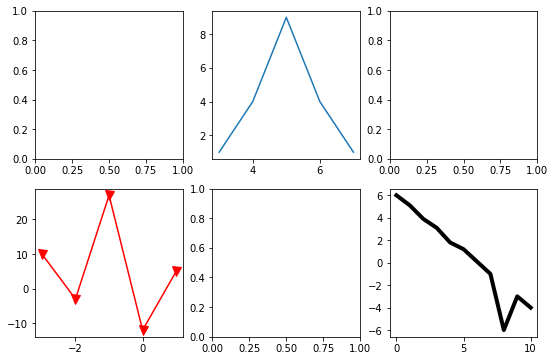

In [32]:
from matplotlib import pyplot as plt
fig,axs=plt.subplots(2, 3, figsize=(9, 6))
axs[0][1].plot([3,4,5,6,7],[1,4,9,4,1])
axs[1][0].plot([-3,-2,-1,0,1],[10,-3,27,-12,5], color='red', marker='v', ms=9)
axs[1][2].plot([6,5.1,3.9,3.1,1.8,1.2,0.1,-1,-6, -3, -4], color='black', linewidth=4)

[Text(0.5, 1.0, 'and yet another')]

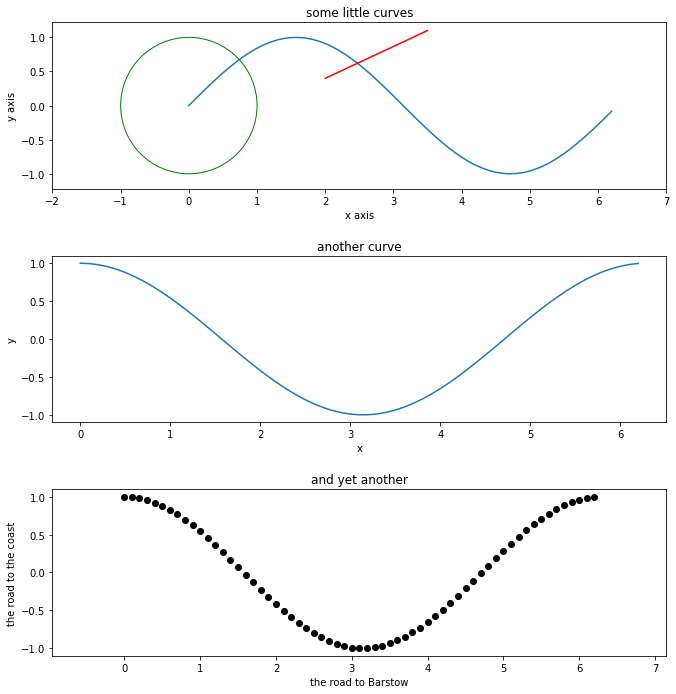

In [20]:
from matplotlib import pyplot as plt
import numpy as np

myPlotSize = 11
fig, ax = plt.subplots(3, figsize=(myPlotSize, myPlotSize))

x = np.arange(0, 2*np.pi, .1)
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))
ax[2].scatter(x, np.cos(x), color='k')

ax[0].add_patch(plt.Circle((0, 0), 1, color = 'g', fill=False))
ax[0].axis('equal')

ax[2].axis('equal')

x1 = 2.0
x2 = 3.5
y1 = 0.4
y2 = 1.1

ax[0].plot([x1, x2], [y1, y2], color='r')

ax[0].set_xlim(-2, 7)
ax[0].set_ylim(-2, 2)

ax[0].set(xlabel='x axis', ylabel = 'y axis', title='some little curves')

fig.subplots_adjust(left=None, bottom=0.1, right=None, top=0.9, wspace=None, hspace=.4)

ax[1].set(xlabel='x', ylabel = 'y')
ax[1].set(title='another curve')

ax[2].set(xlabel='the road to Barstow', ylabel = 'the road to the coast')
ax[2].set(title='and yet another')

## Creating 2D images from arrays

Here is a sequence of revisions of a color-coded function of a 2D space. The first one came from
stack overflow and the subsequent versions are just playing around: Making it simpler and a little
code golf.

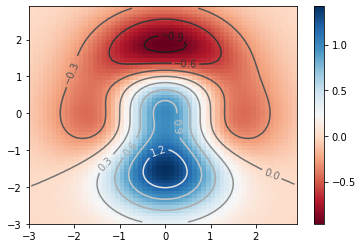

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def z_func(x, y):
    return (1 - (x ** 2 + y ** 3)) * np.exp(-(x ** 2 + y ** 2) / 2)

x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)
x_center = 0.5 * (x[:-1] + x[1:])
y_center = 0.5 * (y[:-1] + y[1:])

X, Y = np.meshgrid(x_center, y_center)
Z = z_func(X, Y)

# pcolormesh needs the pixel edges for x and y
# and with default flat shading, Z needs to be evaluated at the pixel center
plot = plt.pcolormesh(x, y, Z, cmap='RdBu', shading='flat')

# contour needs the centers
cset = plt.contour(X, Y, Z, cmap='gray')
plt.clabel(cset, inline=True)

plt.colorbar(plot)
# plt.savefig('plot_z_flat.png')

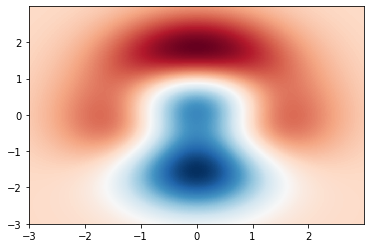

In [6]:
# simpler version

def z_func(x, y): return (1 - (x ** 2 + y ** 3)) * np.exp(-(x ** 2 + y ** 2) / 2)

x = np.arange(-3.0, 3.0, 0.01)
y = np.arange(-3.0, 3.0, 0.01)
x_center = 0.5 * (x[:-1] + x[1:])
y_center = 0.5 * (y[:-1] + y[1:])

X, Y = np.meshgrid(x_center, y_center)
Z = z_func(X, Y)

# pcolormesh needs the pixel edges for x and y
# and with default flat shading, Z needs to be evaluated at the pixel center
plot = plt.pcolormesh(x, y, Z, cmap='RdBu', shading='flat')
# plot = plt.pcolormesh(x, y, Z, cmap='RdBu')


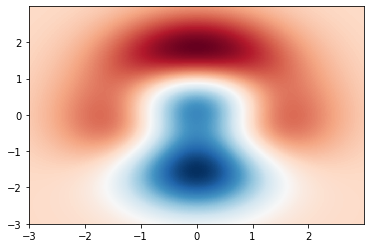

In [7]:
# simpler version

def z_func(x, y): return (1 - (x ** 2 + y ** 3)) * np.exp(-(x ** 2 + y ** 2) / 2)

x = np.arange(-3.0, 3.0, 0.01)
y = np.arange(-3.0, 3.0, 0.01)
x_center = 0.5 * (x[:-1] + x[1:])
y_center = 0.5 * (y[:-1] + y[1:])

X, Y = np.meshgrid(x_center, y_center)
Z = z_func(X, Y)

# pcolormesh needs the pixel edges for x and y
# and with default flat shading, Z needs to be evaluated at the pixel center
# plot = plt.pcolormesh(x, y, Z, cmap='RdBu', shading='flat')
plot = plt.pcolormesh(x, y, Z, cmap='RdBu')

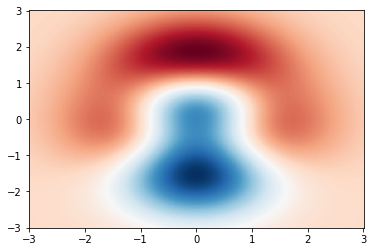

In [18]:
# simpler version
import numpy as np
import matplotlib.pyplot as plt

def z(x, y): return (1 - (x ** 2 + y ** 3)) * np.exp(-(x ** 2 + y ** 2) / 2)

x = np.arange(-3.0, 3.01, 0.01)
y = np.arange(-3.0, 3.01, 0.01)
x_center = 0.5 * (x[:-1] + x[1:])
y_center = 0.5 * (y[:-1] + y[1:])

X, Y = np.meshgrid(x, y)               # or use x_center, y_center
Z = z(X, Y)

# pcolormesh needs the pixel edges for x and y
# and with default flat shading, Z needs to be evaluated at the pixel center
# plot = plt.pcolormesh(x, y, Z, cmap='RdBu', shading='flat')
plot = plt.pcolormesh(x, y, Z, cmap='RdBu')

In [21]:
Z.shape

(601, 601)

(-3.005, 3.004999999999872, -3.005, 3.004999999999872)

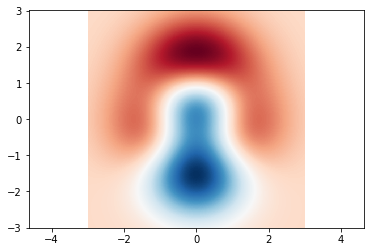

In [25]:
# simpler version
import numpy as np
import matplotlib.pyplot as plt

def z(x, y): return (1 - (x ** 2 + y ** 3)) * np.exp(-(x ** 2 + y ** 2) / 2)

x = np.arange(-3.0, 3.01, 0.01)
y = np.arange(-3.0, 3.01, 0.01)
X, Y = np.meshgrid(x, y)
Z = z(X, Y)
plot = plt.pcolormesh(x, y, Z, cmap='RdBu')
plt.axis('equal')

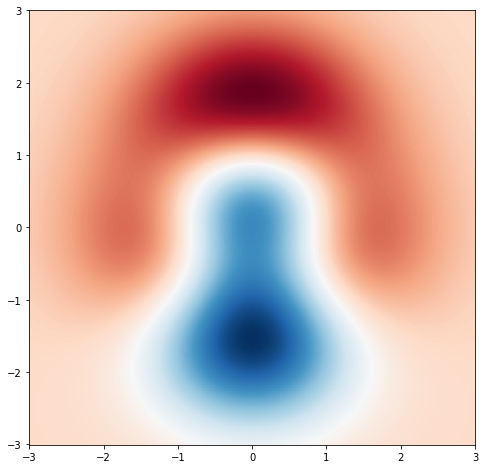

In [33]:
# simpler version
import numpy as np
import matplotlib.pyplot as plt

def z(x, y): return (1 - (x ** 2 + y ** 3)) * np.exp(-(x ** 2 + y ** 2) / 2)

x = np.arange(-3.0, 3.01, 0.01)
y = np.arange(-3.0, 3.01, 0.01)
X, Y = np.meshgrid(x, y)
Z = z(X, Y)
fig, ax = plt.subplots(figsize=(8,8))
ax.pcolormesh(x, y, Z, cmap='RdBu')
plt.show()

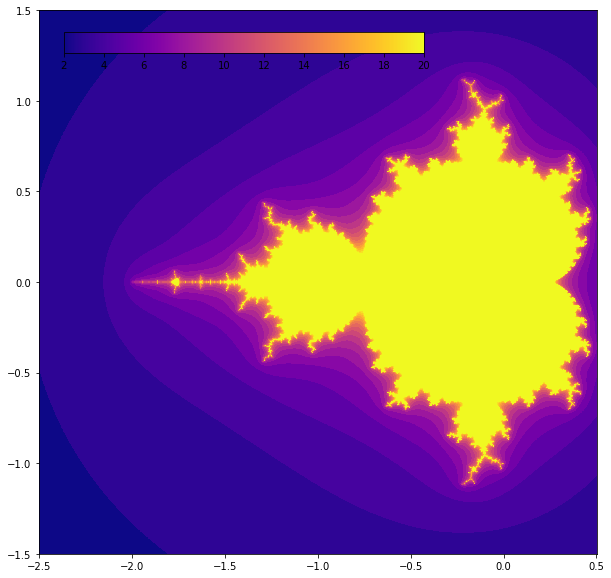

In [70]:
# simpler version
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

def z(x, y):
    lambda_x, lambda_y = x, y
    xs, ys, i = 0., 0., 0
    while i < 20:
        i += 1
        if i == 20: break
        xp, yp = xs**2 - ys**2 + lambda_x, 2*xs*ys + lambda_y
        if sqrt(xp**2 + yp**2) > 4: break
        xs, ys = xp, yp
    return i

z2 = np.vectorize(z)

epsilon = .001
x = np.arange(-2.5, 0.5 + epsilon, epsilon)
y = np.arange(-1.5, 1.5 + epsilon, epsilon)
X, Y = np.meshgrid(x, y)
Z = z2(X, Y)
fig, ax = plt.subplots(figsize=(10,10))

my_cmap = 'plasma'
im=ax.pcolormesh(x, y, Z, cmap=my_cmap)
cax = fig.add_axes([0.16, 0.82, .5, .03])
fig.colorbar(im, cax=cax, orientation='horizontal')
plt.show()

In [78]:
Z.shape

(3001, 3001)

## Finding available options


We want the interface to suggest available options. For each of the following lines: Place the cursor
directly after the initial text and hit the <tab> key.

In [ ]:
plt                                                   # tab does nothing
plt.                                                  # tab lists many many available methods
plt.plot                                              # lists three possible methods
plt.sub                                               # lists six possible methods
plt.subplots                                          # try <shift>+<tab> to get a pop-up documentation box   

#### Additional access options

* < shift > + < tab > + < tab > gives an extended summary
* < shift > + < tab > + < tab > + < tab > + < tab > brings up an extended summary in a pop-up window
* **`plt.subplots?`** shows documentation in a separate window (dismiss using X at upper right)
* **`plt.subplots??`** shows the source code (run the following cell)

In [33]:
plt.subplots??

## Inserting graphics from a GitHub repository

This code makes a temporary copy of a github-based image and displays it in the notebook. This can make use 
of images that are not part of the working repository.


```
import requests, shutil
from pathlib import Path
from PIL import Image

username, repo, folder, fnm = 'robfatland', 'othermathclub', 'images/egon', 'shingle_house.jpg'
ftmp = str(Path.home()) + '/tmp_' + fnm
f = 'https://raw.githubusercontent.com/' + username + '/' + repo + '/master/' + folder + '/' + fnm
a = requests.get(f, stream = True)
if a.status_code == 200:
    with open(ftmp, 'wb') as f: a.raw.decode_content = True; shutil.copyfileobj(a.raw, f)
Image.open(ftmp).resize((500,300))
```